# High order epistasis in asexual fungus sex. 

Initial imports. Download the `epistasis` package [here](https://www.github.com/harmslab/epistasis)

In [1]:
# Import necessary science modules
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Reset some default parameters in matplotlib
import matplotlib as mpl
mpl.rcParams["font.family"] = "Arial"
mpl.rcParams["font.size"] = 10

# Linear epistasis model
from epistasis.models.linear import LinearEpistasisModel

# Nonlinear epitasis model
from epistasis.models.nonlinear import NonlinearEpistasisModel

## Linear epistasis model

The expectation baked into a linear epistasis model is that mutations have individual effects that sum together to give the phenotype. Epistasis, then, describes deviation from this additivity when multiple mutations are measured together. 

(<matplotlib.figure.Figure at 0x109e1cac8>,
  <matplotlib.axes._subplots.AxesSubplot at 0x109e48e80>])

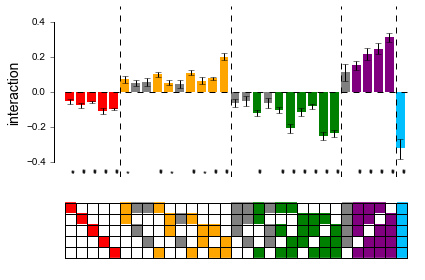

In [2]:
# Location of the data
in_path = "../../datasets/krug1.json"

# Fit epistasis with linear model. 
linear = LinearEpistasisModel.from_json(in_path)
linear.fit()
linear.fit_error()

linear.Plot.interactions(sigmas=1, log_space=True, height_ratio=2)

## Nonlinear epistasis model - saturation curve

We'll "expect" that as more mutations are introduced, their effect diminishes. Thus, the effect of a mutation depends on when it is introduced in the evolutionary trajectory. To capture this saturation, we fit with the following model:

$$
F(f(\vec{x})) = \frac{A \cdot f(\vec{x})}{B + f(\vec{x})}
$$

where $f(\vec{x})$ is the phenotype assuming linear epistasis. 

Fit with a nonlinear least squares regression. 

In [3]:
def saturation(x, saturation, rate):
    """ Saturation function where X is the linear epistasis model. """
    y = (saturation  * x / ( x + rate ))
    return y

R-squared of fit: 0.861160210301
rate: 0.663787410029
saturation: 0.0850990552761


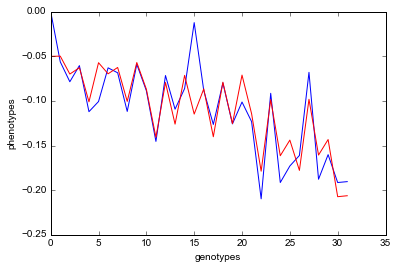

In [4]:
# Initialize a nonlinear LS regression, passing the function above.
nonlinear = NonlinearEpistasisModel.from_json(in_path, order=1, function=saturation)
nonlinear.fit_widget(saturation=(-.2, 0), rate=(0,2, .1))

(<matplotlib.figure.Figure at 0x10b65ca20>,
  <matplotlib.axes._subplots.AxesSubplot at 0x10ac75940>])

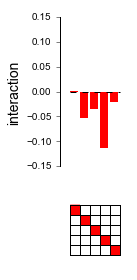

In [5]:
nonlinear.Plot.interactions(sigmas=0, figsize=(2,4), height_ratio=2, log_space=True)

(<matplotlib.figure.Figure at 0x10b74d5f8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10af2d4e0>)

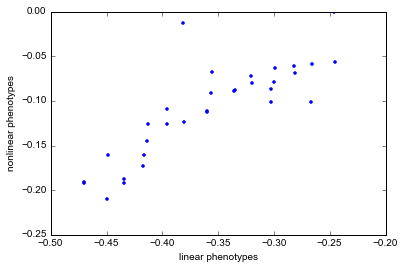

In [6]:
nonlinear.Plot.linear_phenotypes()

## Nonlinear epistasis model - Hill Model

In [34]:
def hill_equation(x, saturation, rate, hill):
    """ Saturation function where X is the linear epistasis model. """
    y = ( saturation / ((rate/x)**hill + 1))
    return y

In [35]:
nonlinear.Stats.predict()

array([-0.04826054, -0.04826838, -0.06868759, -0.06172441, -0.09946983,
       -0.05561474, -0.06869866, -0.06173438, -0.09948571, -0.05562375,
       -0.08767163, -0.14067852, -0.07906272, -0.12666724, -0.07107334,
       -0.11434359, -0.08768567, -0.14070076, -0.07907542, -0.12668733,
       -0.07108479, -0.11436177, -0.17871038, -0.10082799, -0.16149271,
       -0.14547119, -0.17873843, -0.10084408, -0.16151814, -0.14549417,
       -0.20493595, -0.20496797])

In [36]:
nonlinear.phenotypes

array([ 0.        , -0.05625823, -0.07857366, -0.06048075, -0.11210151,
       -0.10072681, -0.06298389, -0.06854213, -0.11182051, -0.05898576,
       -0.08857603, -0.14539036, -0.07160415, -0.1092996 , -0.08618615,
       -0.01233374, -0.08830984, -0.1263888 , -0.07987667, -0.1258082 ,
       -0.10127482, -0.12320502, -0.20971484, -0.09151498, -0.19145145,
       -0.17295398, -0.16115091, -0.06803389, -0.1877553 , -0.16020782,
       -0.19145145, -0.19044029])

R-squared of fit: 0.868196689615
rate: -0.0373726408343
hill: -1.60352595957
saturation: -0.196782297222


/Users/Zsailer/virtual/py3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in power
  app.launch_new_instance()


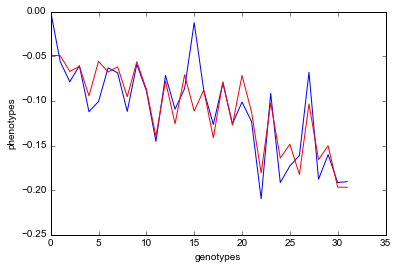

In [37]:
# Initialize a nonlinear LS regression, passing the function above.
nonlinear = NonlinearEpistasisModel.from_json(in_path, order=1, function=hill_equation)
nonlinear.fit_widget(saturation=(-1, 1 ,.1), rate=(-4, 1, .1), hill=(-1, 1, .1))

(<matplotlib.figure.Figure at 0x10c91b668>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10c3bff28>)

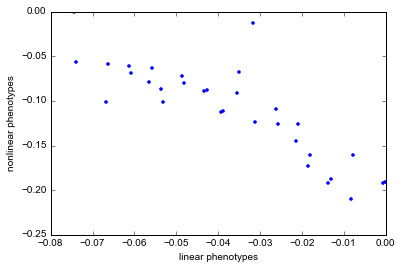

In [40]:
nonlinear.Plot.linear_phenotypes()

(<matplotlib.figure.Figure at 0x10bc8fba8>,
  <matplotlib.axes._subplots.AxesSubplot at 0x10ce50240>])

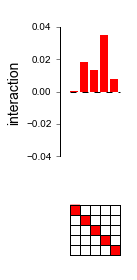

In [41]:
nonlinear.Plot.interactions(sigmas=0, figsize=(2,4), height_ratio=2, log_space=True)